In [3]:
import nazca as nd

Starting layout export...
...gds generation
...Wrote file './RDL.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


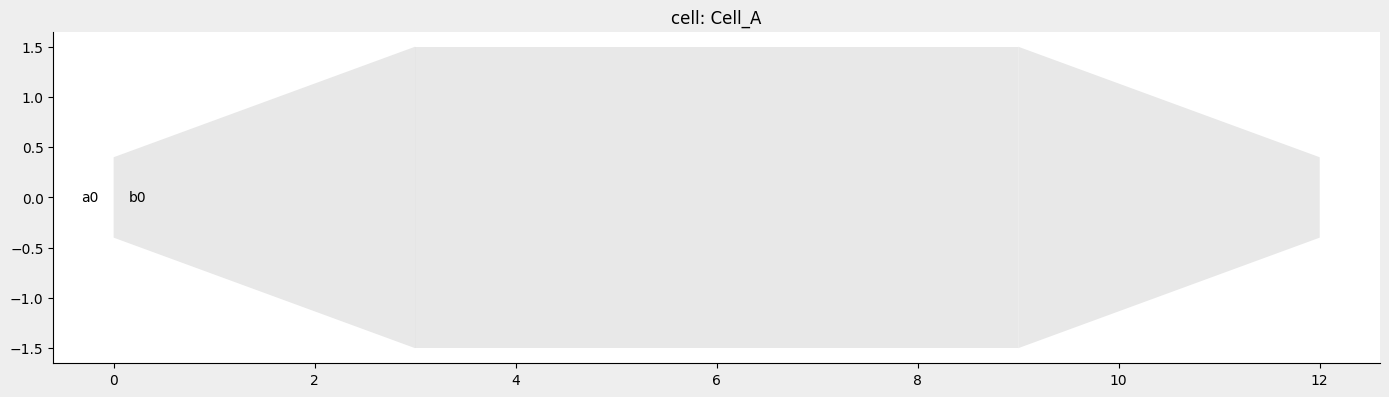

In [24]:
import nazca as nd

with nd.Cell(name='Cell_A') as cella:
    nd.taper(length=3, width1=0.8, width2=3).put()
    nd.strt(length=6,width=3).put()
    nd.taper(length=3, width1=3, width2=0.8).put()

nd.export_gds(cella,"RDL.gds")
nd.export_plt(cella)

In [16]:
# example created by Bright Photonics

print(cella.pin.keys())
# dict_keys(['org', 'a0', 'b0'])

for name, node in cella.pin.items():
    print(f"{name} @ {node.fxya()}")
# org @ (0.000, 0.000, 0.000)
# a0 @ (0.000, 0.000, 180.000)
# b0 @ (0.000, 0.000, 0.000)

dict_keys(['org', 'a0', 'b0'])
org @ (0.000, 0.000, 0.000)
a0 @ (0.000, 0.000, 180.000)
b0 @ (0.000, 0.000, 0.000)


Starting layout export...
...gds generation
...Wrote file './Upper.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


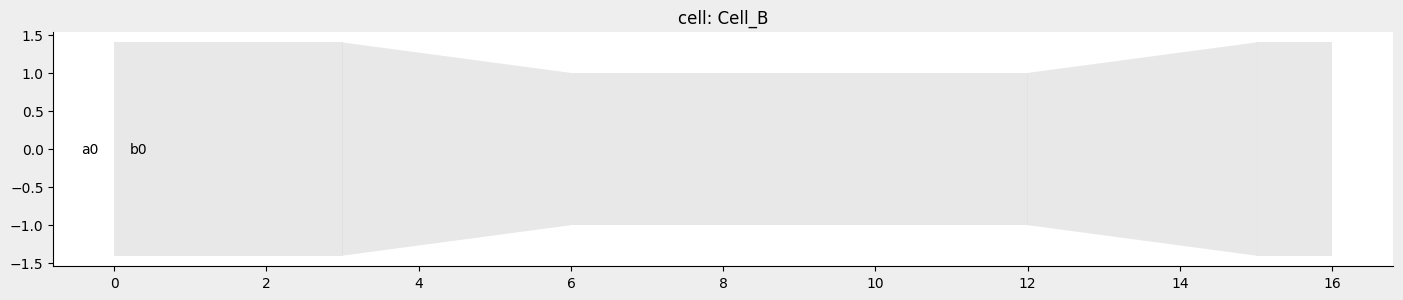

In [26]:
with nd.Cell(name='Cell_B') as cellb:
    nd.strt(length=3,width=2.8).put()
    nd.taper(length=3, width1=2.8, width2=2.0).put()
    nd.strt(length=6,width=2).put()
    nd.taper(length=3, width1=2.0, width2=2.8).put()
    nd.strt(length=1,width=2.8).put()

nd.export_gds(cellb,"Upper.gds")
nd.export_plt(cellb)

Starting layout export...
...gds generation
...Wrote file './Lower.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


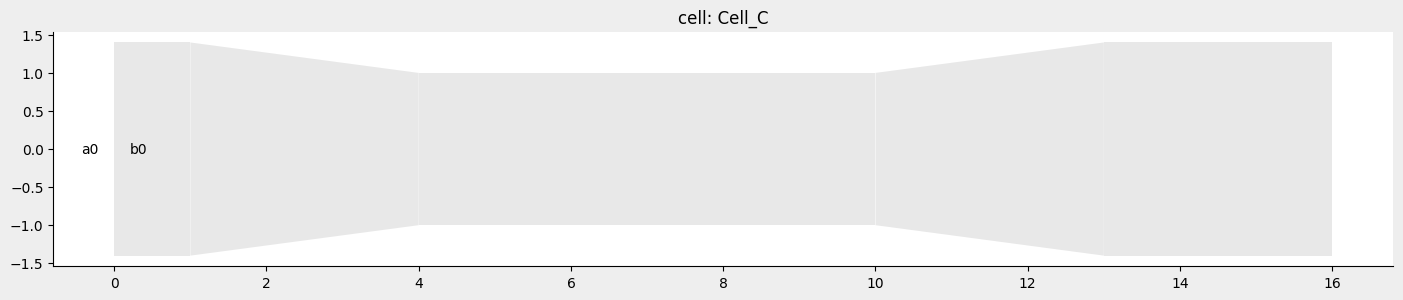

In [28]:
with nd.Cell(name='Cell_C') as cellc:
    nd.strt(length=1,width=2.8).put()
    nd.taper(length=3, width1=2.8, width2=2.0).put()
    nd.strt(length=6,width=2).put()
    nd.taper(length=3, width1=2.0, width2=2.8).put()
    nd.strt(length=3,width=2.8).put()

nd.export_gds(cellc,"Lower.gds")
nd.export_plt(cellc)

/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


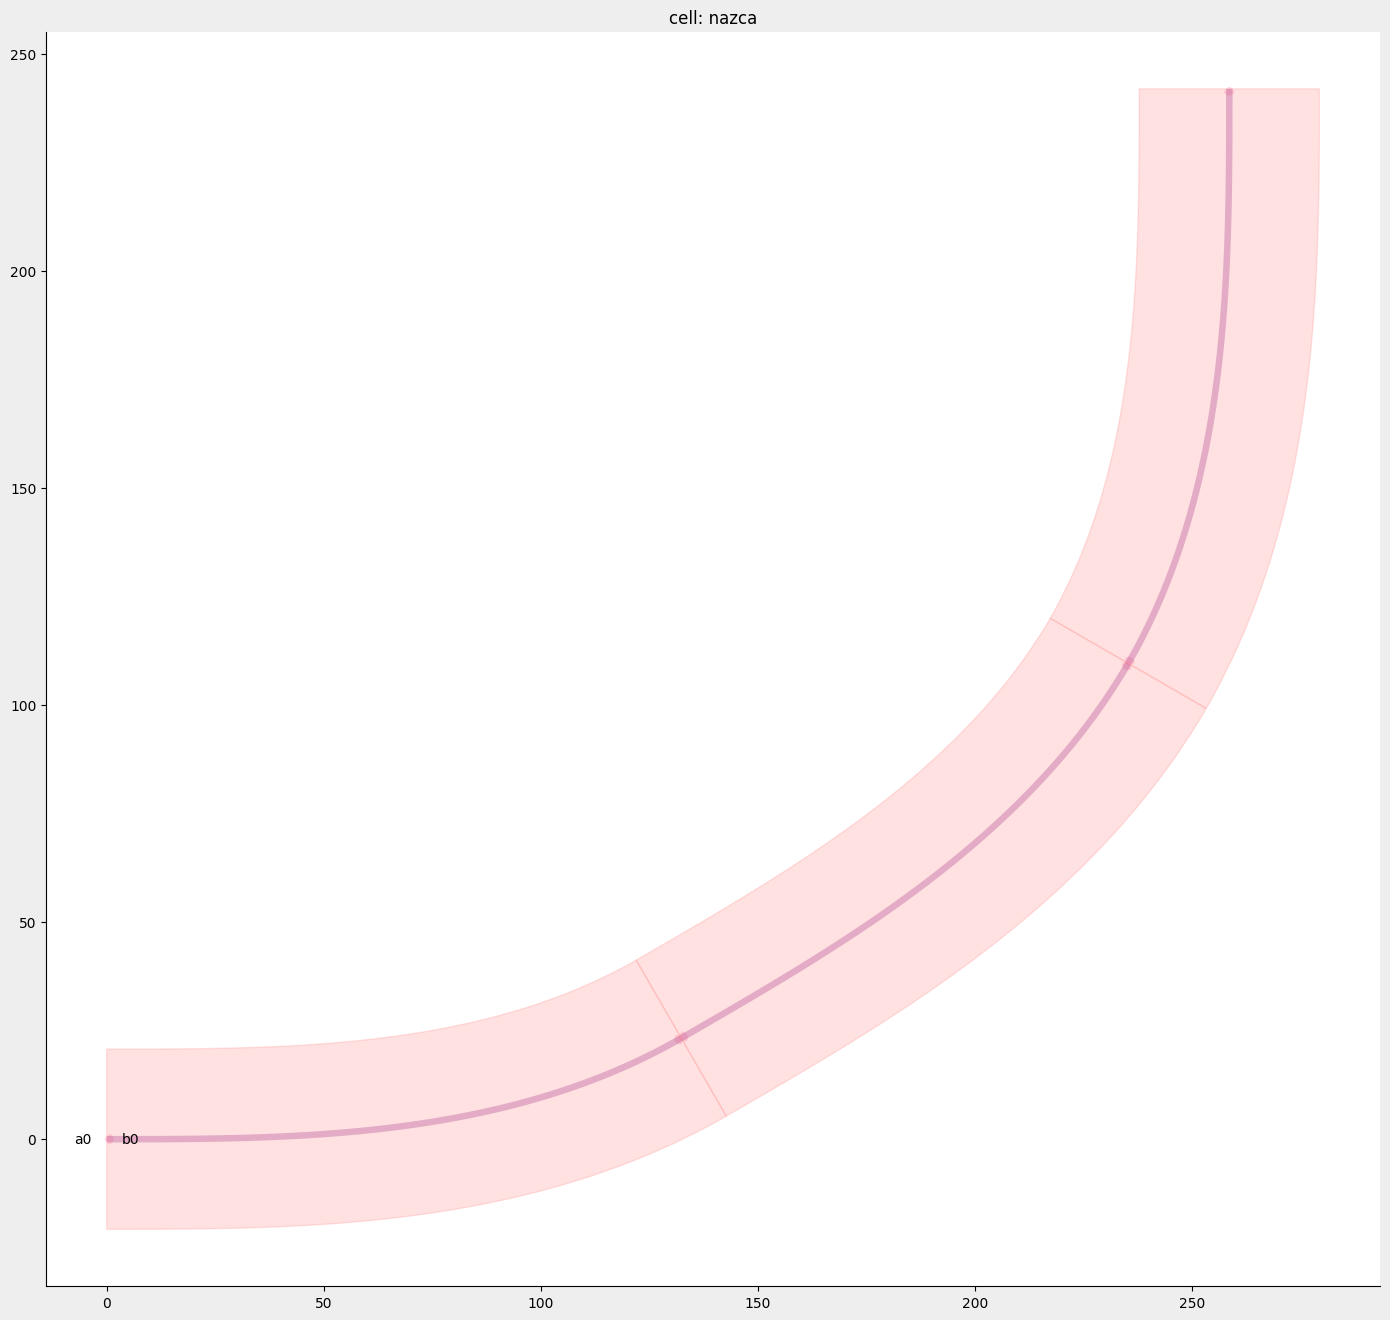

In [7]:
# example created by Bright Photonics

import nazca as nd
import nazca.demofab as demo

with nd.Cell(name='Euler1') as euler1:
    e1 = demo.deep.euler(angle=30).put()
    demo.deep.euler(angle=30).put()
    e2 = demo.deep.euler(angle=30).put('b0', flip=True)
    # nd.Pin('a0', pin=e1.pin['a0']).put()
    # nd.Pin('b0', pin=e2.pin['a0']).put()

euler1.put()
nd.export_plt()

In [4]:
e1.pin['a0']

<Node(id=340, name='43_a0') object in instance of cell 'ic_euler_Deep_27', xs='Deep', width=1.5, radius=0.000, xya=(0.000, 0.000, 180.000), type=None, io=0, remark='None'>

/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


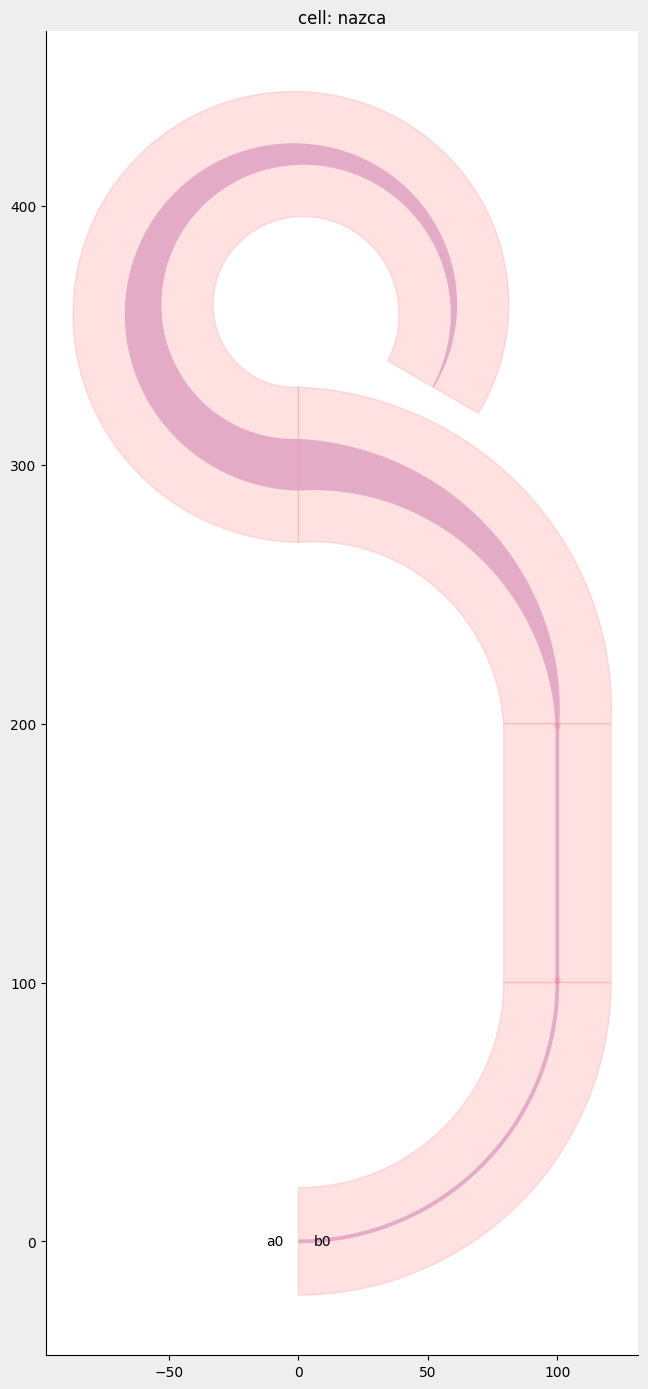

In [9]:
# example created by Bright Photonics

import numpy as np
import nazca as nd
import nazca.demofab as demo

# create functions x, y, w for the viper-based mask_element:
def x(t, radius, angle, **kwargs):
    """X as function of t and free parameters."""
    return radius * np.cos(t * angle * np.pi / 180)
def y(t, radius, angle, **kwargs):
    """Y as function of t and free parameters."""
    return radius * np.sin(t * angle * np.pi / 180)
def w(t, width1=None, width2=None, **kwargs):
    """Width as function of t, width1 and width2 and free parameters."""
    return width1 + (width2 - width1) * t

# create the new parametric function using the template Tp_viper():
params = {'radius': 100, 'angle':90} # include defaults for *all* free parameters used in the functions x, y and w.
tapered_bend = nd.Tp_viper(x, y, w, xs='Deep', **params)

# put waveguides:
tapered_bend().put(0)
demo.deep.strt(length=100).put()
tapered_bend(angle=90, width2=20, N=1000).put()
tapered_bend(angle=-300, radius=60, width1=20, width2=0.5, N=2000).put()
nd.export_plt()